In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X = load_iris().data
y = load_iris().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(lr.predict(X_test),y_test))

0.8888888888888888


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X = load_iris().data[:, [2,3]]
y = load_iris().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [131]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(lr.predict(X_test),y_test))

0.7111111111111111


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


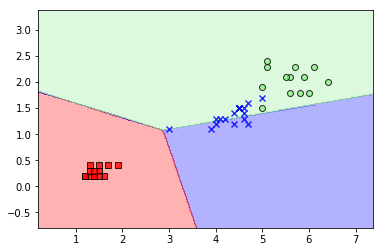

In [141]:
plot_decision_regions(X=X_test, y=y_test, classifier=lr, test_idx=range(105, 45))

In [119]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X = load_iris().data
y = load_iris().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.svm import SVC

svc = SVC(kernel='linear')

svc.fit(X_train, y_train)
accuracy_score(svc.predict(X_test),y_test)

0.9777777777777777

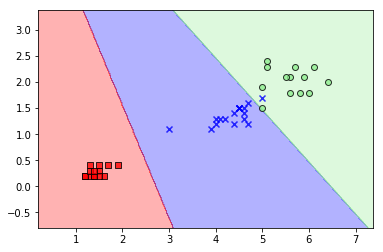

In [140]:
plot_decision_regions(X=X_test, y=y_test, classifier=svc, test_idx=range(105, 45))

In [135]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X = load_iris().data
y = load_iris().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)
print(accuracy_score(tree.predict(X_test), y_test))

0.9555555555555556


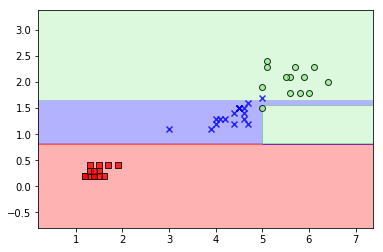

In [139]:
plot_decision_regions(X=X_test, y=y_test, classifier=tree, test_idx=range(105, 45))

In [145]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled='True', rounded=True,
                           class_names = ['Setosa', 'Versicolor', 'Virginica'],
                           feature_names = ['petal length', 'petalwidth'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

In [133]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c=' ',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [137]:
y_test.shape

(45,)

In [138]:
X.shape

(150, 2)

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X = load_iris().data
y = load_iris().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)

accuracy_score(forest.predict(X_test), y_test)
#plot_decision_regions(X_test, y_test, classifier=forest, test_idx=range(105, 45))


0.9555555555555556